In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle
import warnings
#import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier



# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline


Read Data

In [4]:
# Importing the dataset
df=pd.read_csv("D:\My Projects\yusuf tarek project\credit_train.csv",na_values=['x'])
df


,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,46184,74905,CUS_0xbbda,August,le Stevem,50,598-28-8368,Manager,72099.14,5842.350694,...,Good,1421.95,35.960435,28 Years and 2 Months,NM,426.797077,417.148202,Low_spent_Small_value_payments,290.8918608420343,1.0
1,63927,101520,CUS_0x1e51,July,Raymondl,32,887-23-0031,Entrepreneur,17443.94,1714.661667,...,Bad,2816.57,35.515016,11 Years and 5 Months,Yes,55.673626,37.777137,High_spent_Small_value_payments,338.015403853136,NaN
2,65974,104591,CUS_0x1765,June,Harryw,32,966-30-5287,_______,15186.175,1527.514583,...,Standard,9.70,36.578680,23 Years and 7 Months,No,10.915070,53.306883,Low_spent_Small_value_payments,378.5295055439751,NaN
3,68006,107639,CUS_0x751c,June,Jessican,19,220-63-1416,Accountant,177696.92,15090.076667,...,Good,1182.91,35.080063,25 Years and 10 Months,No,74.732590,1283.649824,Low_spent_Medium_value_payments,430.62525257098235,NaN
4,84461,132322,CUS_0x1c59,May,Dayz,41,277-13-7658,Doctor,19188.055,1358.004583,...,_,464.09,28.878950,22 Years and 6 Months,No,44.602370,47.128123,Low_spent_Large_value_payments,314.06996555020623,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54735,47297,76578,CUS_0xb443,January,Kerbere,21,#F%$D@*&8,Doctor,21271789.0,12452.330000,...,Standard,1205.02,26.343072,26 Years and 10 Months,No,224.631416,858.769871,Low_spent_Small_value_payments,451.8317125065498,NaN
54736,14571,27488,CUS_0x36ed,March,Carewn,32,398-22-8099,Developer,28452.8,2267.066667,...,_,1909.79,27.733014,18 Years and 1 Months,Yes,106.584142,96.054678,Low_spent_Small_value_payments,314.06784670954283,NaN
54737,43014,70151,CUS_0x204b,June,Nius,31,893-44-1748,Mechanic,52256.67,4322.722500,...,_,2109.67,40.760453,9 Years and 0 Months,Yes,82.844023,138.755825,Low_spent_Medium_value_payments,490.6724020757467,0.0
54738,85052,133209,CUS_0x3c97,April,Tetsushiz,44,856-06-6147,Journalist,9741.195,1097.766250,...,_,582.95,31.234320,26 Years and 6 Months,Yes,13.376546,93.395907,Low_spent_Small_value_payments,293.00417234279536,NaN


## Data Understanding

In [5]:
# Showing the first 5 rows
df.head(5)

,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,46184,74905,CUS_0xbbda,August,le Stevem,50,598-28-8368,Manager,72099.14,5842.350694,...,Good,1421.95,35.960435,28 Years and 2 Months,NM,426.797077,417.148202,Low_spent_Small_value_payments,290.8918608420343,1.0
1,63927,101520,CUS_0x1e51,July,Raymondl,32,887-23-0031,Entrepreneur,17443.94,1714.661667,...,Bad,2816.57,35.515016,11 Years and 5 Months,Yes,55.673626,37.777137,High_spent_Small_value_payments,338.015403853136,NaN
2,65974,104591,CUS_0x1765,June,Harryw,32,966-30-5287,_______,15186.175,1527.514583,...,Standard,9.70,36.578680,23 Years and 7 Months,No,10.915070,53.306883,Low_spent_Small_value_payments,378.5295055439751,NaN
3,68006,107639,CUS_0x751c,June,Jessican,19,220-63-1416,Accountant,177696.92,15090.076667,...,Good,1182.91,35.080063,25 Years and 10 Months,No,74.732590,1283.649824,Low_spent_Medium_value_payments,430.62525257098235,NaN
4,84461,132322,CUS_0x1c59,May,Dayz,41,277-13-7658,Doctor,19188.055,1358.004583,...,_,464.09,28.878950,22 Years and 6 Months,No,44.602370,47.128123,Low_spent_Large_value_payments,314.06996555020623,1.0


In [6]:
# Showing the columns
df.columns

Index(['Unnamed: 0', 'ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN',
       'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
# Show the value counts
df['Customer_ID'].value_counts()

Customer_ID
CUS_0x219c    8
CUS_0x7403    8
CUS_0xb74c    8
CUS_0x8bce    8
CUS_0x6578    8
             ..
CUS_0xb529    1
CUS_0xae70    1
CUS_0xc3a6    1
CUS_0x185e    1
CUS_0x1a96    1
Name: count, Length: 12479, dtype: int64

In [8]:
# Showing the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54740 entries, 0 to 54739
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                54740 non-null  int64  
 1   ID                        54740 non-null  int64  
 2   Customer_ID               54740 non-null  object 
 3   Month                     54740 non-null  object 
 4   Name                      49213 non-null  object 
 5   Age                       54740 non-null  object 
 6   SSN                       54740 non-null  object 
 7   Occupation                54740 non-null  object 
 8   Annual_Income             54740 non-null  object 
 9   Monthly_Inhand_Salary     54740 non-null  float64
 10  Num_Bank_Accounts         54740 non-null  int64  
 11  Num_Credit_Card           54740 non-null  int64  
 12  Interest_Rate             54740 non-null  int64  
 13  Num_of_Loan               54740 non-null  object 
 14  Type_o

In [9]:
# Drop the columns
df.drop(columns=['Customer_ID','ID'],inplace=True)

In [10]:
# Drop the column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
# check shape
df.shape

(54740, 26)

In [12]:
# check duplicate
df.duplicated().sum()

np.int64(0)

In [13]:
# describe the dataset
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
count,54740.000000,54740.000000,54740.000000,54740.000000,54740.000000,54740.000000,54740.000000,54740.000000,54740.000000,54740.000000,25588.000000
mean,4205.106827,16.634710,22.909847,74.188071,21.054512,27.592218,1424.694102,32.281263,1411.066778,195.913926,0.379787
std,3186.265970,114.924728,130.295385,473.022799,14.840879,192.130784,1153.240584,5.111356,8305.102900,199.740666,0.485343
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,0.230000,20.172942,0.000000,0.000000,0.000000
25%,1630.701667,3.000000,4.000000,8.000000,10.000000,3.000000,566.080000,28.054546,30.201032,72.183624,0.000000
50%,3107.820417,6.000000,6.000000,13.000000,18.000000,6.000000,1165.265000,32.317994,69.436189,129.198295,0.000000
75%,5981.988333,7.000000,7.000000,20.000000,28.000000,9.000000,1941.930000,36.490079,160.392925,237.892531,1.000000
max,15204.633333,1798.000000,1499.000000,5789.000000,67.000000,2594.000000,4998.070000,49.564519,82331.000000,1977.326102,1.000000


In [14]:
#count the number of missing values in each column.
df.isnull().sum()

Month                           0
Name                         5527
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 6252
Delay_from_due_date             0
Num_of_Delayed_Payment       3830
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance               649
Credit_Score                29152
dtype: int64

[Text(0.5, 1.0, 'Attacks and subtypes')]

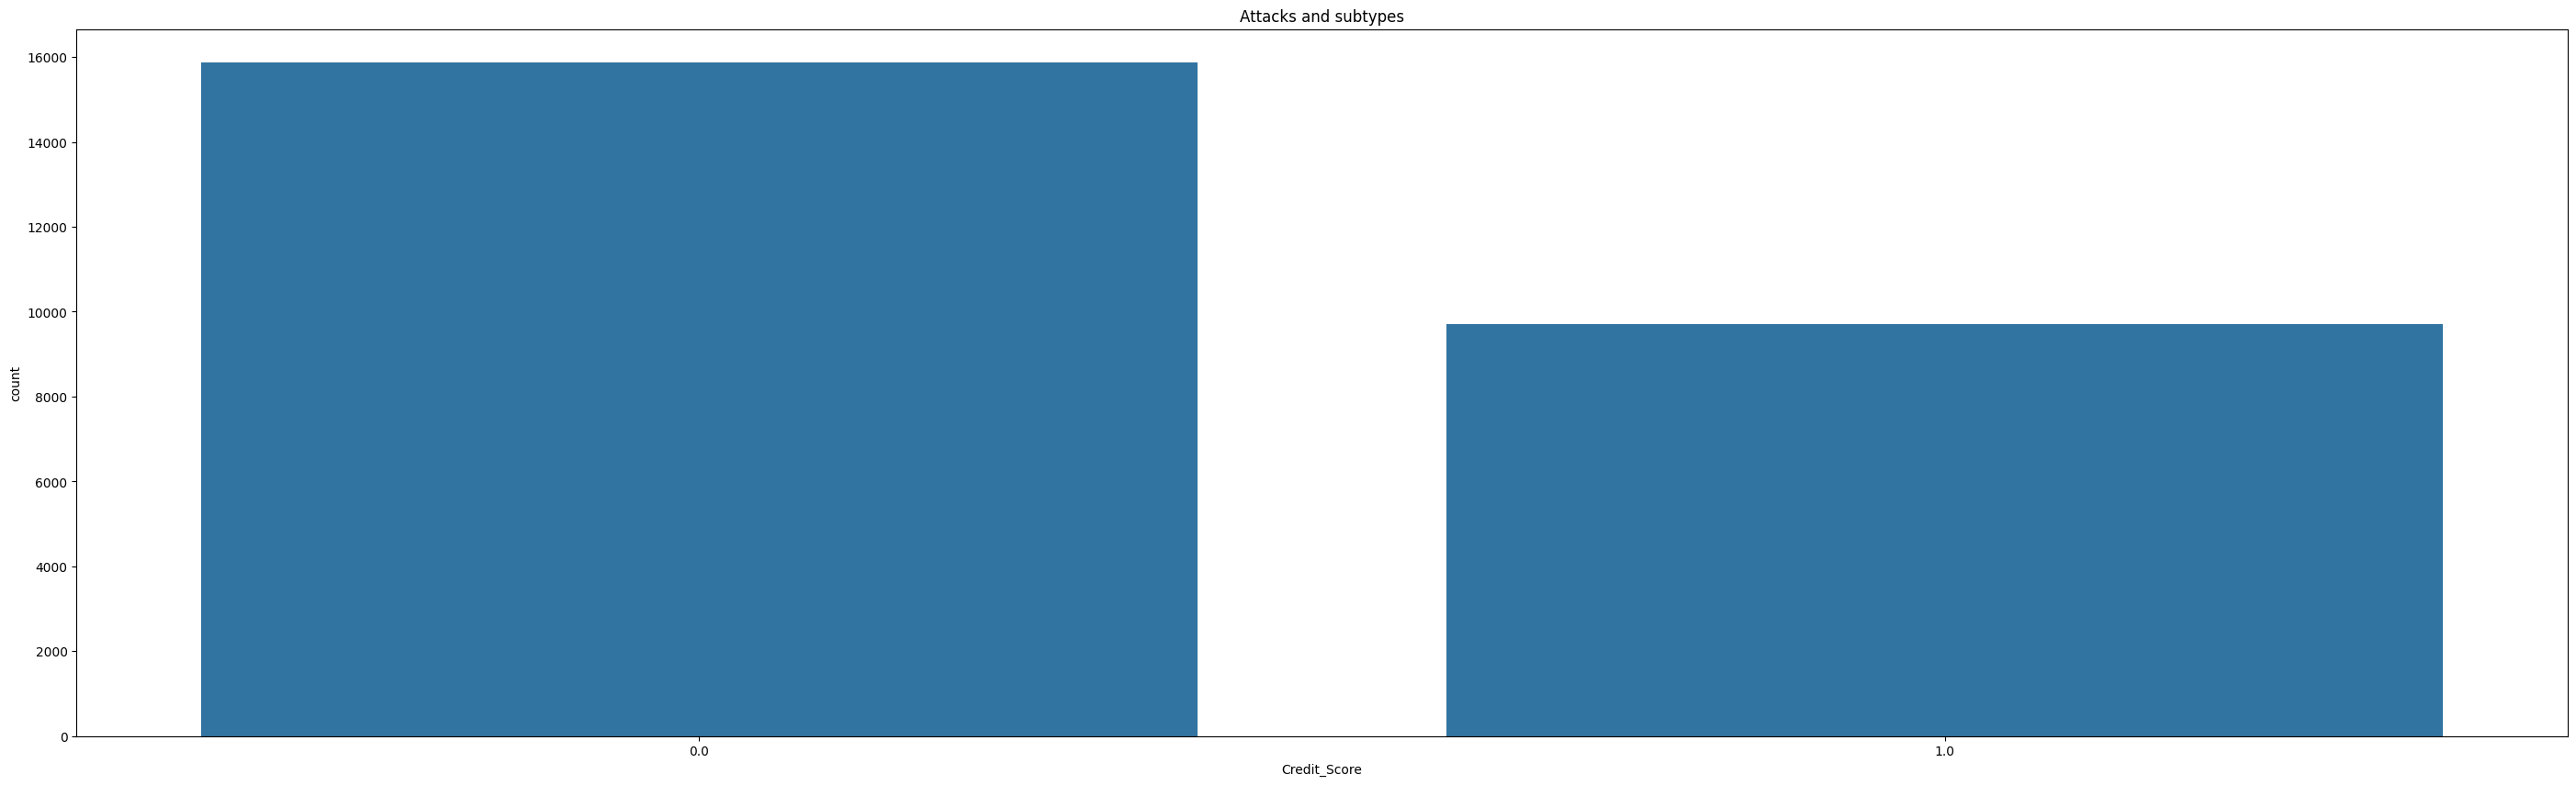

In [15]:
# adjust the figure size
plt.figure(figsize=(35,10))
#plotting the countplot
sns.countplot(x=df['Credit_Score']).set(title='Attacks and subtypes')

In [16]:
# Showing the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54740 entries, 0 to 54739
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     54740 non-null  object 
 1   Name                      49213 non-null  object 
 2   Age                       54740 non-null  object 
 3   SSN                       54740 non-null  object 
 4   Occupation                54740 non-null  object 
 5   Annual_Income             54740 non-null  object 
 6   Monthly_Inhand_Salary     54740 non-null  float64
 7   Num_Bank_Accounts         54740 non-null  int64  
 8   Num_Credit_Card           54740 non-null  int64  
 9   Interest_Rate             54740 non-null  int64  
 10  Num_of_Loan               54740 non-null  object 
 11  Type_of_Loan              48488 non-null  object 
 12  Delay_from_due_date       54740 non-null  int64  
 13  Num_of_Delayed_Payment    50910 non-null  object 
 14  Change

[Text(0.5, 1.0, 'Attacks and subtypes')]

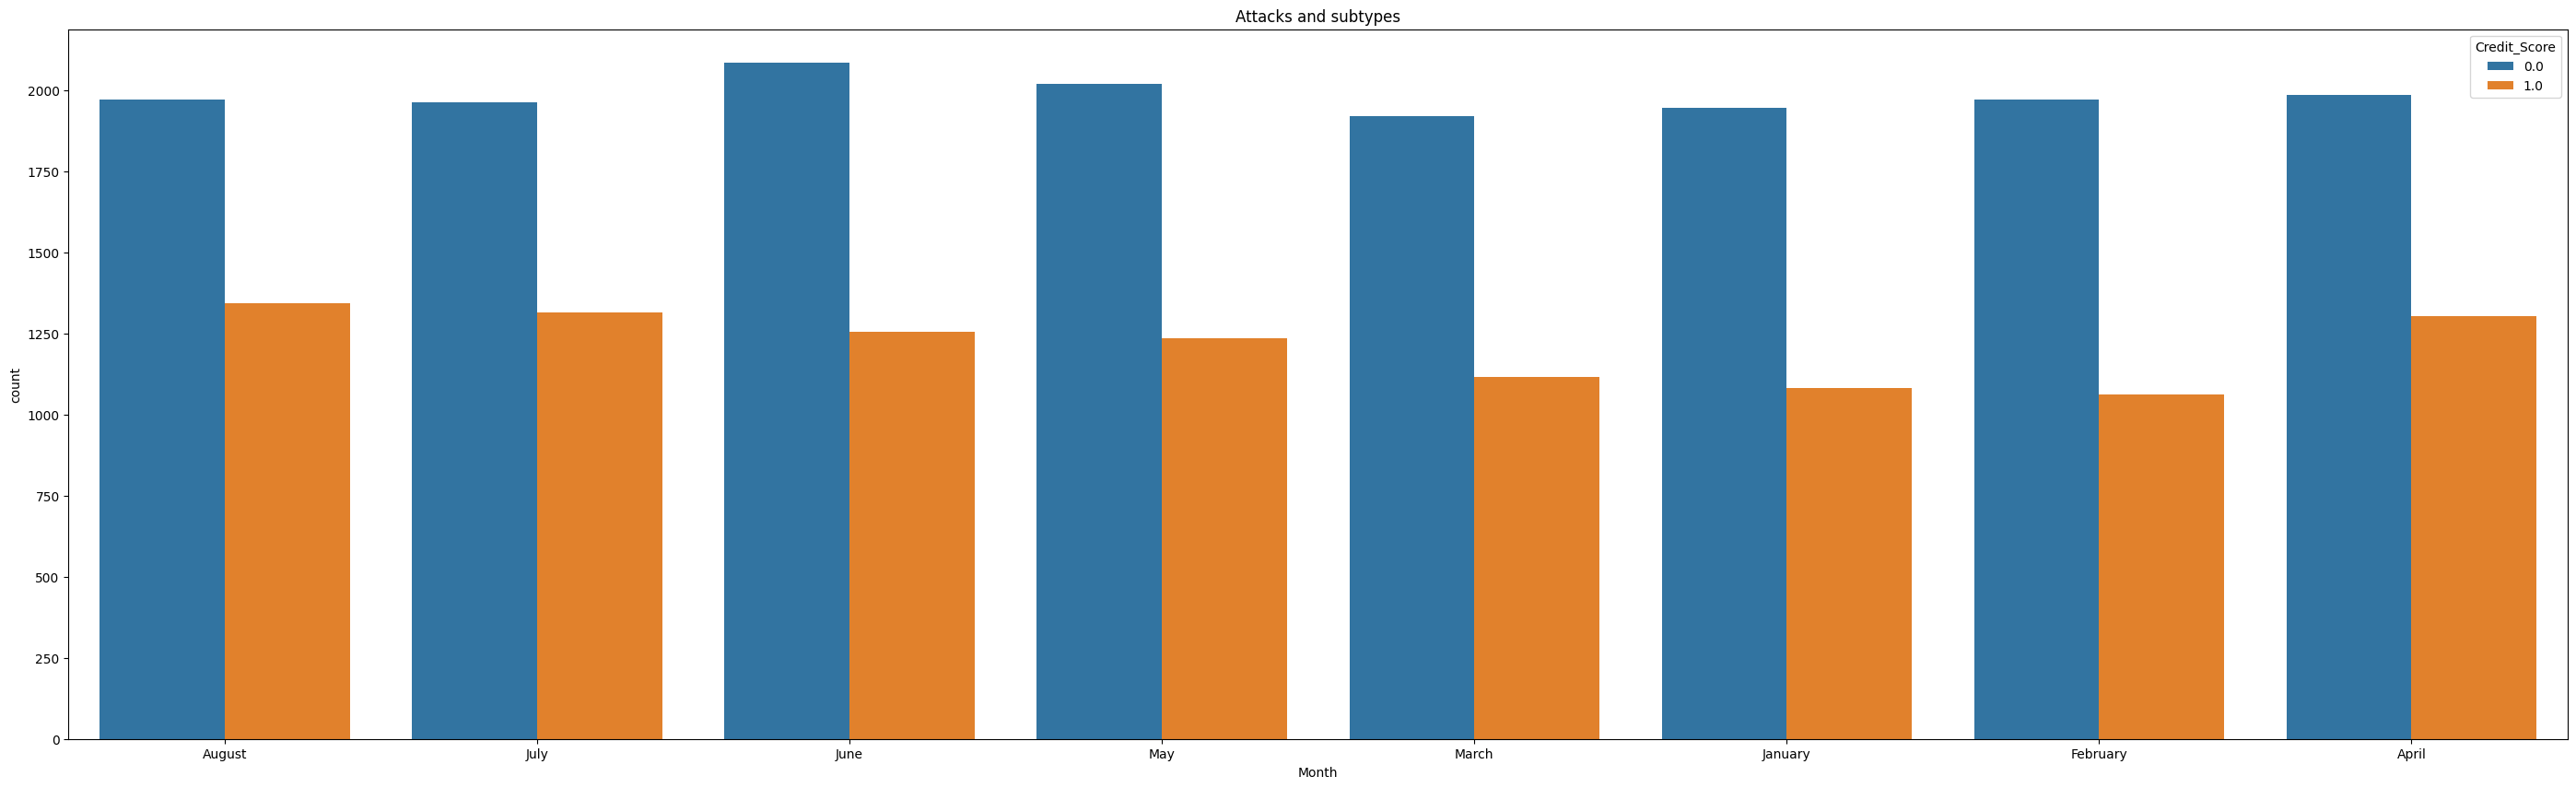

In [17]:
#adjust the figure size
plt.figure(figsize=(35,10))
#plotting the countplot 
sns.countplot(x=df['Month'],hue=df['Credit_Score']).set(title='Attacks and subtypes') 

# preprocessing data

In [18]:
# check null values
df.isnull().sum()

Month                           0
Name                         5527
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 6252
Delay_from_due_date             0
Num_of_Delayed_Payment       3830
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance               649
Credit_Score                29152
dtype: int64

In [19]:
# Showing the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54740 entries, 0 to 54739
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     54740 non-null  object 
 1   Name                      49213 non-null  object 
 2   Age                       54740 non-null  object 
 3   SSN                       54740 non-null  object 
 4   Occupation                54740 non-null  object 
 5   Annual_Income             54740 non-null  object 
 6   Monthly_Inhand_Salary     54740 non-null  float64
 7   Num_Bank_Accounts         54740 non-null  int64  
 8   Num_Credit_Card           54740 non-null  int64  
 9   Interest_Rate             54740 non-null  int64  
 10  Num_of_Loan               54740 non-null  object 
 11  Type_of_Loan              48488 non-null  object 
 12  Delay_from_due_date       54740 non-null  int64  
 13  Num_of_Delayed_Payment    50910 non-null  object 
 14  Change

In [20]:
# Droping the null values
df.dropna(inplace=True)

In [21]:
# check null values
df.isnull().sum()

Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [22]:
# Showing the head
df.head(5)

,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,August,le Stevem,50,598-28-8368,Manager,72099.14,5842.350694,4,3,2,...,Good,1421.95,35.960435,28 Years and 2 Months,NM,426.797077,417.148202,Low_spent_Small_value_payments,290.8918608420343,1.0
4,May,Dayz,41,277-13-7658,Doctor,19188.055,1358.004583,5,4,2,...,_,464.09,28.878950,22 Years and 6 Months,No,44.602370,47.128123,Low_spent_Large_value_payments,314.06996555020623,1.0
6,March,Sue Zeidlerd,37,267-54-6899,Journalist,21093.41,1677.784167,1,5,10,...,Good,694.73,25.494067,26 Years and 11 Months,No,29.959037,30.709461,High_spent_Medium_value_payments,357.109919252976,1.0
8,May,Giorgio Gavinu,26,206-94-5126,Doctor,20958.75,1470.562500,9,9,21,...,Bad,1310.95,23.304684,18 Years and 5 Months,Yes,130.528737,35.144850,High_spent_Medium_value_payments,231.38266329995997,0.0
13,April,McLaughlinc,23,590-91-7790,_______,15937.74,1144.145000,9,9,2703,...,_,2432.09,33.232912,12 Years and 7 Months,Yes,38.417517,60.294603,Low_spent_Large_value_payments,285.7023805962588,0.0


# encoding

In [23]:
# Select the categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [24]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
for col in categorical_columns:
    # Convert all values in the column to strings
    df[col] = df[col].astype(str)

    # Initialize LabelEncoder
    le = LabelEncoder()

    # Fit and transform the column
    df[col] = le.fit_transform(df[col])

In [25]:
# Droping the Name column
df.drop(columns=['Name'],inplace=True)

In [26]:
# Show the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18968 entries, 0 to 54734
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     18968 non-null  int64  
 1   Age                       18968 non-null  int64  
 2   SSN                       18968 non-null  int64  
 3   Occupation                18968 non-null  int64  
 4   Annual_Income             18968 non-null  int64  
 5   Monthly_Inhand_Salary     18968 non-null  float64
 6   Num_Bank_Accounts         18968 non-null  int64  
 7   Num_Credit_Card           18968 non-null  int64  
 8   Interest_Rate             18968 non-null  int64  
 9   Num_of_Loan               18968 non-null  int64  
 10  Type_of_Loan              18968 non-null  int64  
 11  Delay_from_due_date       18968 non-null  int64  
 12  Num_of_Delayed_Payment    18968 non-null  int64  
 13  Changed_Credit_Limit      18968 non-null  int64  
 14  Num_Credit_

# feature engineering

In [27]:
# dropping the 'Credit_Score' column from the df
df_features = df.drop(columns=["Credit_Score"])

In [28]:
# Assign the features DataFrame to 'X' and the target variable 'Credit_Score' to 'y' 
X = df_features
y = df["Credit_Score"]

In [29]:
# Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=3,
                                                    shuffle=True)
len(X_train), len(X_test), len(y_train), len(y_test)

(13277, 5691, 13277, 5691)

In [30]:
# Initialize the RobustScaler to scale the features by removing the median 
# and scaling the data according to the Interquartile Range (IQR).
# Fit the scaler on the training data and transform both the training and testing sets.
Ro_scaler = RobustScaler()
X_train = Ro_scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = Ro_scaler.transform(X_test)        # Transform the testing data using the fitted scaler

In [31]:
from sklearn.feature_selection import RFE, SelectKBest, chi2
# Ensure all values in X are non-negative by adding a constant
X_transformed = X - X.min().min()

# Perform Chi-Square test
chi2_stat, p_values = chi2(X_transformed, y)

# Create a DataFrame to display the results
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Stat': chi2_stat,
    'p-value': p_values
})

In [32]:
# Sort the results of the Chi-Square test by the 'Chi2 Stat' column in descending order
# This allows us to identify which features have the strongest association with the target variable.
chi2_results.sort_values(by='Chi2 Stat', ascending=False, inplace=True)
# Print the sorted Chi-Square test results for review
print("Chi-Square Test Results:")
print(chi2_results)

Chi-Square Test Results:
                     Feature     Chi2 Stat        p-value
5      Monthly_Inhand_Salary  4.456226e+06   0.000000e+00
16          Outstanding_Debt  4.357053e+06   0.000000e+00
23           Monthly_Balance  3.622637e+06   0.000000e+00
4              Annual_Income  2.363972e+05   0.000000e+00
21   Amount_invested_monthly  1.735961e+05   0.000000e+00
11       Delay_from_due_date  5.505952e+04   0.000000e+00
9                Num_of_Loan  3.961277e+04   0.000000e+00
12    Num_of_Delayed_Payment  2.830720e+04   0.000000e+00
1                        Age  2.687638e+04   0.000000e+00
20       Total_EMI_per_month  2.155135e+04   0.000000e+00
13      Changed_Credit_Limit  1.813520e+04   0.000000e+00
18        Credit_History_Age  1.155297e+04   0.000000e+00
14      Num_Credit_Inquiries  6.302639e+03   0.000000e+00
6          Num_Bank_Accounts  4.014075e+03   0.000000e+00
7            Num_Credit_Card  1.974958e+03   0.000000e+00
8              Interest_Rate  8.695572e+02  4.0

In [33]:
# Import necessary libraries for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Initialize variables to track the best accuracy, number of features, and corresponding feature set
best_accuracy = 0
best_k = 0
best_features = []
results=[]
# Initialize the Random Forest classifier with a fixed random state for reproducibility
clf = RandomForestClassifier(random_state=0)
# Loop over a range of k values to select the top k features based on the Chi-Square test
for k in range(1, X.shape[1] + 1):
    # Select the top k features using the Chi-Square test
    selector = SelectKBest(chi2, k=k)
    X_new = selector.fit_transform(X_transformed, y)
    # Get the names of the selected features
    selected_features = X_transformed.columns[selector.get_support()]

    print(f"\nTop {k} features selected based on Chi-Square test:")
    selected_features = list(selected_features)
    print(selected_features, end="\n\n")

    # Prepare the data with the selected features
    X_selected = df[selected_features].to_numpy()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                        test_size=0.3,
                                                        random_state=3,
                                                        shuffle=True)

    # Train the Random Forest classifier on the selected features
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics: recall, precision, F1 score, and confusion matrix
    accuracy = metrics.recall_score(y_test, y_pred, average='weighted')
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    false_negatives = cm.sum(axis=1) - np.diag(cm)

    # Store results for the current k
    results.append({
        'num_features': k,
        'recall': accuracy,
        'precision': precision,
        'f1_score': f1,
        'false_negatives': false_negatives.sum()
    })

    #  Print the classification report for the current model
    print(f"Classification report for top {k} features:")
    print(classification_report(y_test, y_pred))
    print(f"{'------' * 9}")

# # Create a DataFrame from the collected results
results_df = pd.DataFrame(results)

# Save the results to a CSV file for later use
results_df.to_csv('feature_selection_comparison_chi2_project.csv', index=False)
# Print the best accuracy achieved and the corresponding number of features used
print(f"\nBest accuracy achieved: {results_df['recall'].max():.4f} with top {results_df.loc[results_df['recall'].idxmax(), 'num_features']} features.")
print(f"Best features: {best_features}")




Top 1 features selected based on Chi-Square test:
['Monthly_Inhand_Salary']



Classification report for top 1 features:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      3770
         1.0       0.90      0.88      0.89      1921

    accuracy                           0.93      5691
   macro avg       0.92      0.92      0.92      5691
weighted avg       0.93      0.93      0.93      5691

------------------------------------------------------

Top 2 features selected based on Chi-Square test:
['Monthly_Inhand_Salary', 'Outstanding_Debt']

Classification report for top 2 features:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      3770
         1.0       0.91      0.94      0.92      1921

    accuracy                           0.95      5691
   macro avg       0.94      0.95      0.94      5691
weighted avg       0.95      0.95      0.95      5691

------------------------------------------------------

Top 3 features selected based on Chi-Square test:
['M

In [34]:
import sklearn
print(sklearn.__version__)

1.5.1


In [35]:
# Define the feature set 'X' by selecting specific columns from the DataFrame 'df' that are relevant for model training.
# The target variable 'y' is defined as the 'Credit_Score' column from the DataFrame.
X=df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']]
y=df['Credit_Score']

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,        # Use 30% of the data for testing
                                                    random_state=3,      # Ensure reproducibility of the split
                                                    shuffle=True)        # Shuffle the data before splitting

# Get the lengths of the training and testing sets
len(X_train), len(X_test), len(y_train), len(y_test)  # Verify the sizes of the splits

(13277, 5691, 13277, 5691)

In [37]:
# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,        # 30% of the data will be used for testing
                                                    random_state=3,      # Ensure reproducibility of the split
                                                    shuffle=True)        # Shuffle the data before splitting for randomness

# Output the lengths of the training and testing sets
len(X_train), len(X_test), len(y_train), len(y_test)  # Verify and display the sizes of the training and testing sets

(13277, 5691, 13277, 5691)

In [38]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(cm, class_names, figsize=(15, 15), colorbar=True):
    """
    Plots a confusion matrix as a heatmap.
    """
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=figsize)
    # Use seaborn's heatmap to plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, 
                yticklabels=class_names, cbar=colorbar, ax=ax)
    ax.set_xlabel('Predicted')  # Set the x-axis label
    ax.set_ylabel('True')  # Set the y-axis label
    plt.title('Confusion Matrix')  # Set the title of the plot
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()  # Display the plot

def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    """
    Evaluates a multi-class classification model and prints metrics.
    """
    # Extract unique class names from the true labels
    class_names = np.unique(Y_test)

    # Predict class labels using the provided model
    Pred_Value = Model_Abb.predict(X_test)

    # Calculate various evaluation metrics
    Accuracy = metrics.accuracy_score(Y_test, Pred_Value)  # Calculate accuracy
    Sensitivity = metrics.recall_score(Y_test, Pred_Value, average='macro')  # Calculate sensitivity (recall)
    Precision = metrics.precision_score(Y_test, Pred_Value, average='macro')  # Calculate precision
    F1_score = metrics.f1_score(Y_test, Pred_Value, average='macro')  # Calculate F1 score
    Recall = metrics.recall_score(Y_test, Pred_Value, average='macro')  # Calculate recall

    # Print the evaluation metrics
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy, 3)))
    print('The {} Model Sensitivity = {}\n'.format(Model_Name, np.round(Sensitivity, 3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision, 3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score, 3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall, 3)))
    print('--------------------------------------------------\n')

    # Compute the confusion matrix
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    # Plot the confusion matrix
    plot_confusion_matrix(Confusion_Matrix, class_names=class_names, figsize=(7, 7), colorbar=True)

    # Plot ROC Curve for each class
    plt.figure(figsize=(10, 7))  # Set the figure size for the ROC curve plot
    for i in range(len(class_names)):
        # Display ROC curve for each class
        RocCurveDisplay.from_predictions(Y_test == class_names[i], Pred_Value == class_names[i], 
                                         name=str(class_names[i]), ax=plt.gca())
    plt.title('ROC Curve')  # Set the title for the ROC curve plot
    plt.show()  # Display the ROC curve plot


In [39]:
# Initialize the Logistic Regression model
LR = LogisticRegression()

# Fit the Logistic Regression model to the training data, using 'X_train' as the feature set and 'y_train' as the target variable.
LR.fit(X_train, y_train)

LogisticRegression()

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.829

The Logistic Regression Model Sensitivity = 0.807

The Logistic Regression Model Precision  = 0.809

The Logistic Regression Model F1 Score   = 0.808

The Logistic Regression Model Recall     = 0.807

--------------------------------------------------



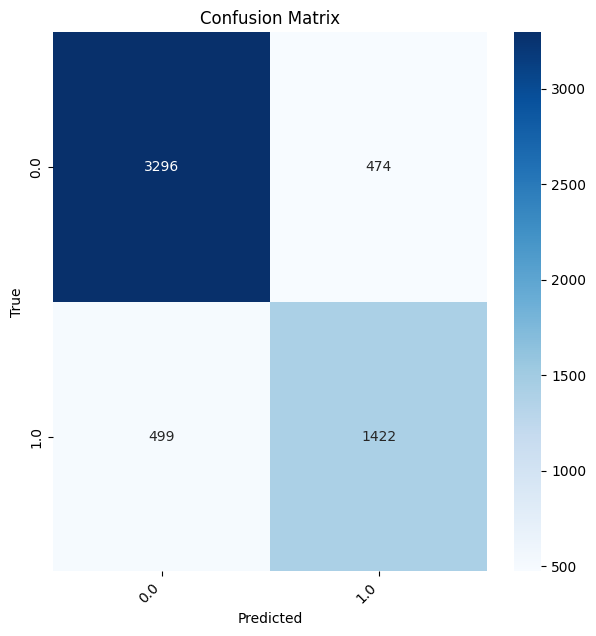

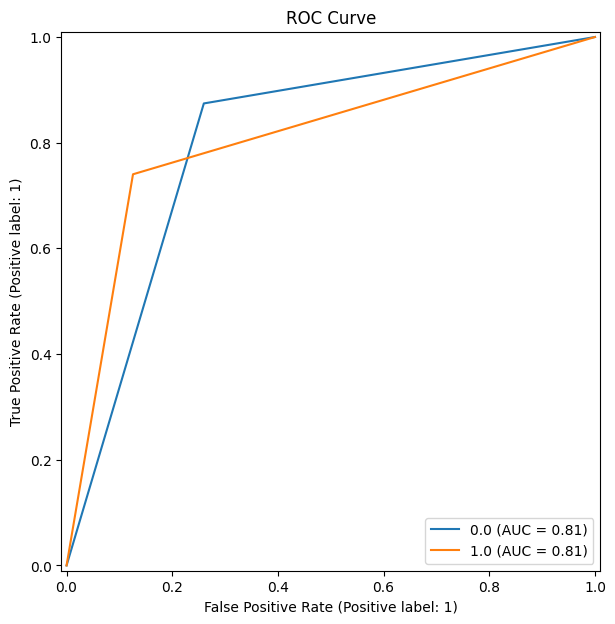

In [40]:
# Evaluate the Logistic Regression model
Evaluate('Logistic Regression', LR, X_test, y_test)

In [41]:
# Initialize the Decision Tree Classifier
DT =DecisionTreeClassifier( max_depth=20,random_state=42,criterion='entropy')
# Fit the Decision Tree Classifier
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.872

The Decision Tree Classifier Model Sensitivity = 0.868

The Decision Tree Classifier Model Precision  = 0.854

The Decision Tree Classifier Model F1 Score   = 0.86

The Decision Tree Classifier Model Recall     = 0.868

--------------------------------------------------



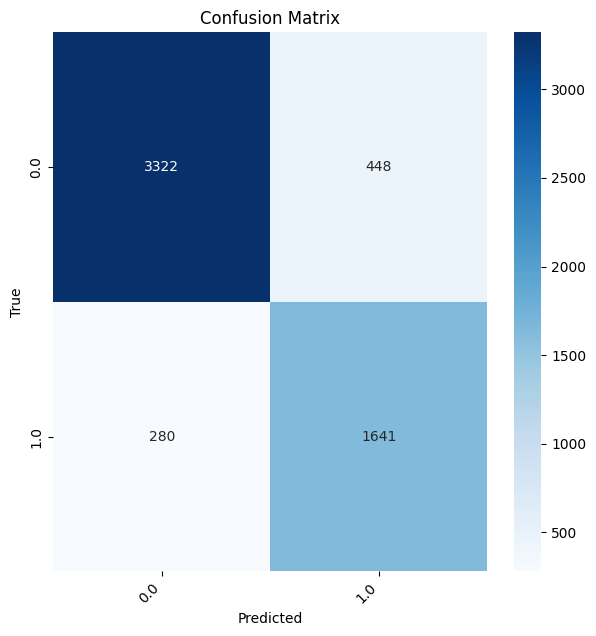

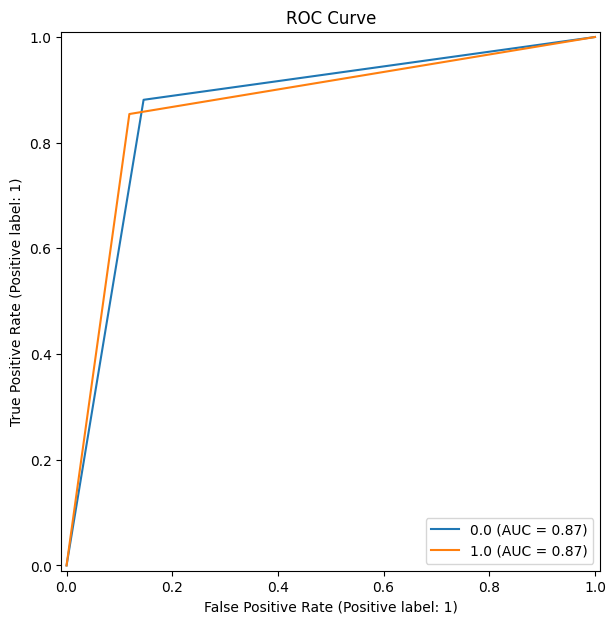

In [42]:
# Evaluate the Decision Tree Classifier
Evaluate('Decision Tree Classifier', DT, X_test, y_test)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 0.907

The Random Forest Classifier Model Sensitivity = 0.907

The Random Forest Classifier Model Precision  = 0.892

The Random Forest Classifier Model F1 Score   = 0.898

The Random Forest Classifier Model Recall     = 0.907

--------------------------------------------------



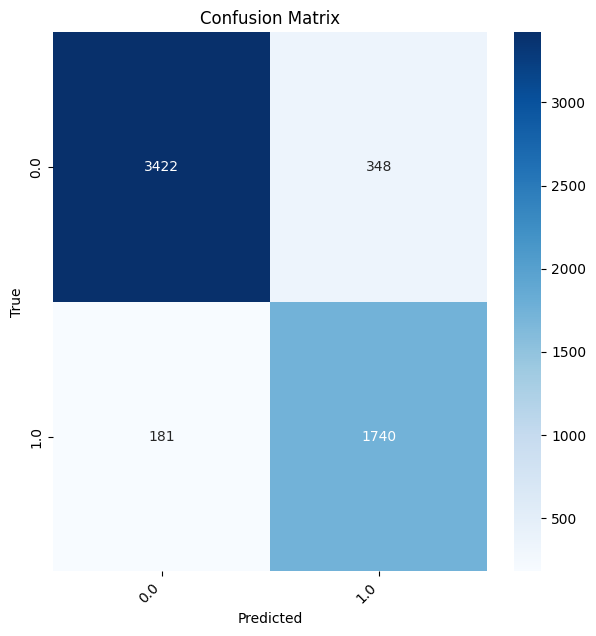

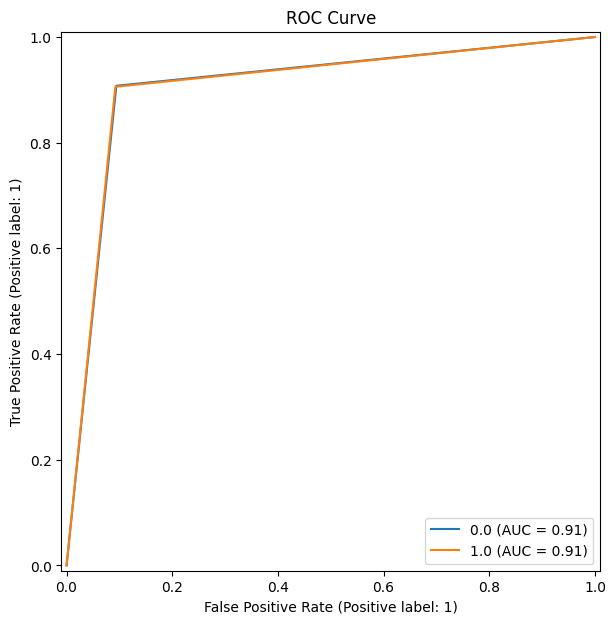

In [43]:
# Initialize the Random Forest Classifier
RF = RandomForestClassifier(max_depth=70)

# Train the Random Forest model on the training data
RF.fit(X_train, y_train)

# Evaluate the performance of the Random Forest model
Evaluate('Random Forest Classifier', RF, X_test, y_test)

--------------------------------------------------

The KNN Model Accuracy   = 0.804

The KNN Model Sensitivity = 0.787

The KNN Model Precision  = 0.781

The KNN Model F1 Score   = 0.784

The KNN Model Recall     = 0.787

--------------------------------------------------



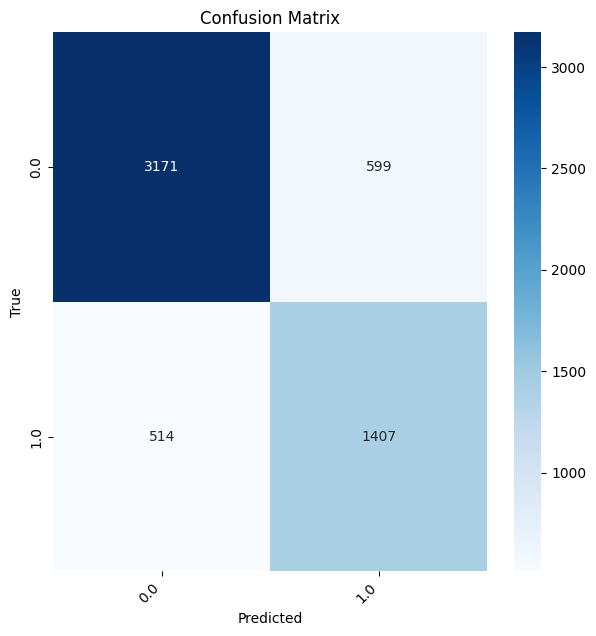

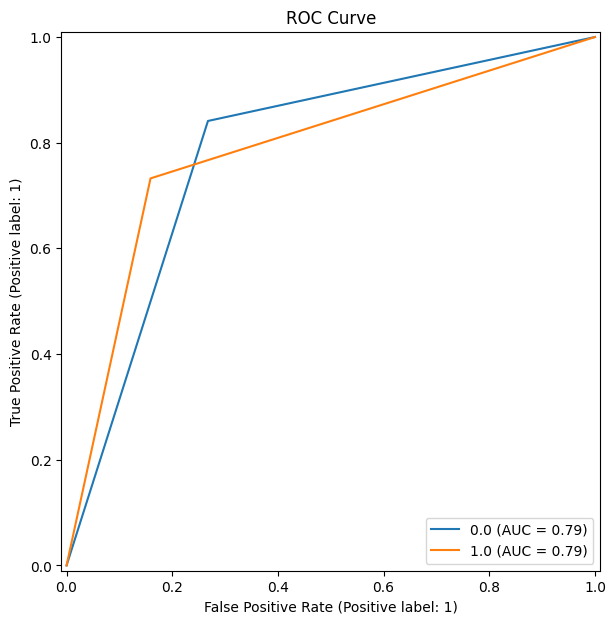

In [44]:
# Initialize the K-Nearest Neighbors Classifier
KNN = KNeighborsClassifier(n_neighbors=10)

# Train the K-Nearest Neighbors model on the training data
KNN.fit(X_train, y_train)

# Evaluate the performance of the K-Nearest Neighbors model
Evaluate('KNN', KNN, X_test, y_test)

# pipe line and cross validation(5)

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# Define the pipeline steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features
    ('pca', PCA(n_components=2)),  # Step 2: Reduce dimensions using PCA
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Step 3: Classifier
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Scores: [0.78993147 0.7886136  0.78729573 0.79725811 0.78354864]
Mean Accuracy: 0.79


--------------------------------------------------

The Gradient Boosting Classifier Model Accuracy   = 0.871

The Gradient Boosting Classifier Model Sensitivity = 0.869

The Gradient Boosting Classifier Model Precision  = 0.852

The Gradient Boosting Classifier Model F1 Score   = 0.859

The Gradient Boosting Classifier Model Recall     = 0.869

--------------------------------------------------



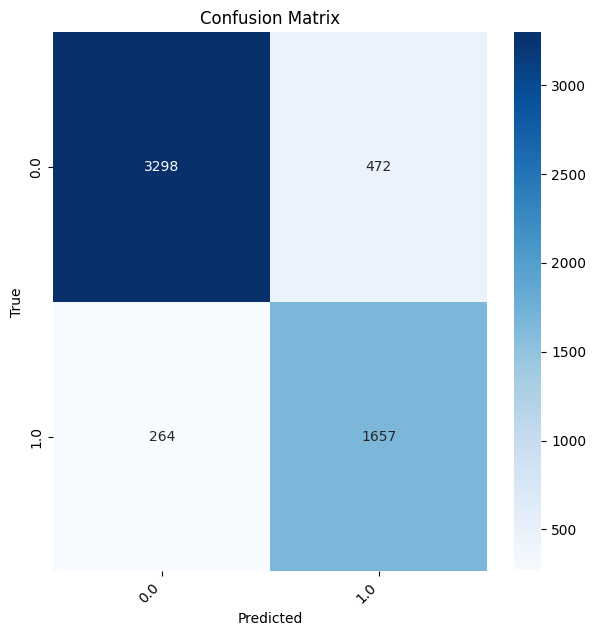

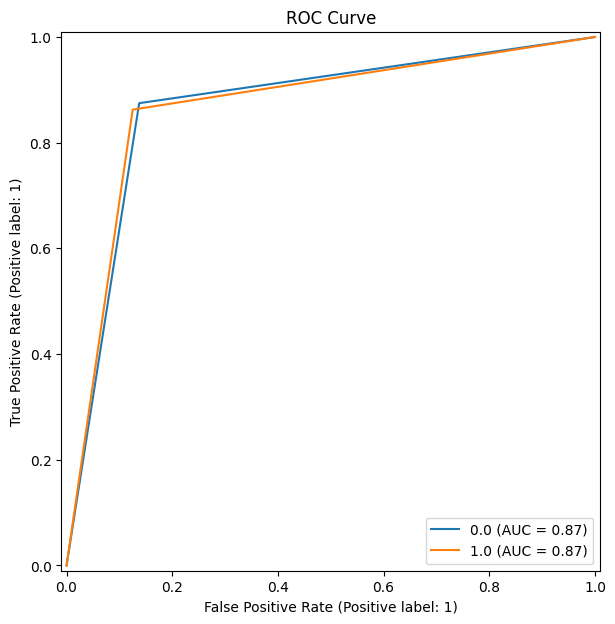

In [46]:
# Instantiate the Gradient Boosting Classifier with default parameters
GB = GradientBoostingClassifier()

# Train the Gradient Boosting Classifier on the training data
GB.fit(X_train, y_train)

# Evaluate the performance of the Gradient Boosting Classifier
Evaluate('Gradient Boosting Classifier', GB, X_test, y_test)

## Comparison Table
                Model  Accuracy  F1 Score    Recall  Precision
0       Random Forest  0.904938  0.905926  0.904938   0.908927
1                 KNN  0.804428  0.805430  0.804428   0.806805
2                 SVC  0.872079  0.873301  0.872079   0.876115
3  LogisticRegression  0.829028  0.828751  0.829028   0.828508
4   Gradient Boosting  0.870673  0.872160  0.870673   0.876067


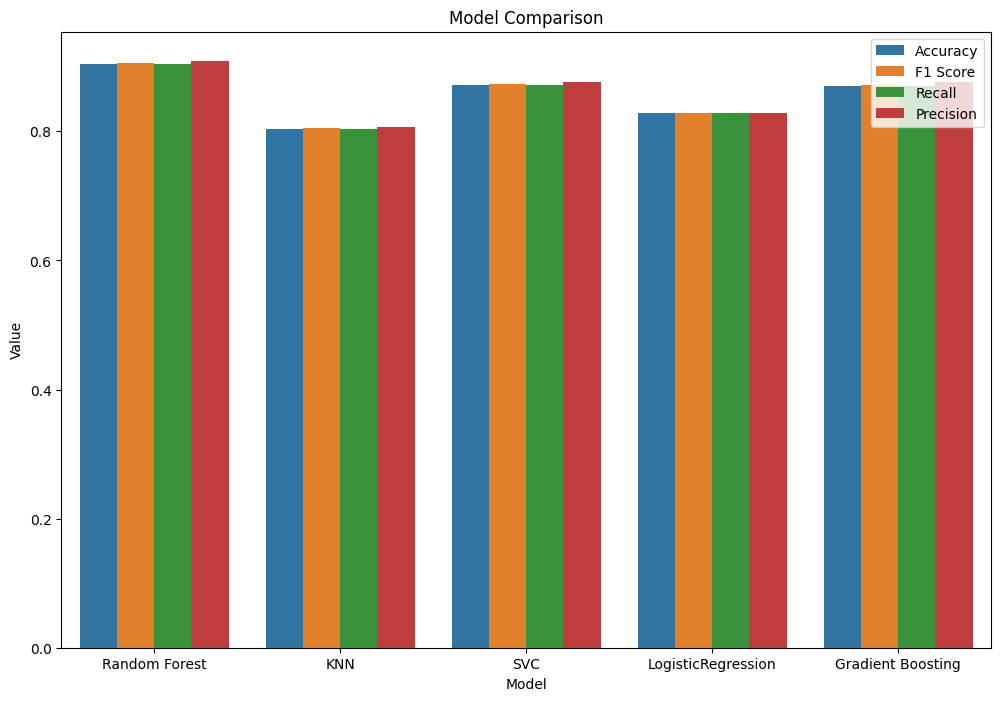

## Random Forest Confusion Matrix and Classification Report
[[3407  363]
 [ 178 1743]]
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      3770
         1.0       0.83      0.91      0.87      1921

    accuracy                           0.90      5691
   macro avg       0.89      0.91      0.90      5691
weighted avg       0.91      0.90      0.91      5691

## KNN Confusion Matrix and Classification Report
[[3171  599]
 [ 514 1407]]
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      3770
         1.0       0.70      0.73      0.72      1921

    accuracy                           0.80      5691
   macro avg       0.78      0.79      0.78      5691
weighted avg       0.81      0.80      0.81      5691

## SVC Confusion Matrix and Classification Report
[[3322  448]
 [ 280 1641]]
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90      3

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# Function to compare models
def compare_models(models, X_train, X_test, y_train, y_test):
    results = []
    for model, name in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        results.append({
            'model_name': name,
            'accuracy': accuracy,
            'f1': f1,
            'recall': recall,
            'precision': precision,
            'confusion_matrix': cm,
            'classification_report': report
        })
    return results

# Define your models
models = [
    (RF, 'Random Forest'),
    (KNN, 'KNN'),
    (DT, 'SVC'),
    (LR,'LogisticRegression'),
    (GB, 'Gradient Boosting'),
]

# Compare the models
results = compare_models(models, X_train, X_test, y_train, y_test)

# Create a dataframe for comparison
results_df = pd.DataFrame({
    'Model': [result['model_name'] for result in results],
    'Accuracy': [result['accuracy'] for result in results],
    'F1 Score': [result['f1'] for result in results],
    'Recall': [result['recall'] for result in results],
    'Precision': [result['precision'] for result in results]
})

# Melt the dataframe for easier plotting
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Print comparison table
print("## Comparison Table")
print(results_df)

# Plot comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=results_melted)
plt.title('Model Comparison')
plt.legend(loc='upper right')
plt.show()

# Print confusion matrices and classification reports
for result in results:
    print(f"## {result['model_name']} Confusion Matrix and Classification Report")
    print(result['confusion_matrix'])
    print(result['classification_report'])


End of ML

In [48]:
#! pip install pipeline_Knn

In [49]:
#! pip install joblib

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Define your pipeline
pipeline_Knn = Pipeline([
    ('scaler', StandardScaler()),  # Optional: Scale features
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Adjust n_neighbors as needed
])

# Assuming X_train and y_train are your training data and labels
pipeline_Knn.fit(X_train, y_train)

# Now you can save the trained pipeline
joblib.dump(pipeline_Knn, 'pipeline_Knn.pkl')

['pipeline_Knn.pkl']

In [51]:
import joblib

# Save the trained model to a .pkl file using joblib
joblib.dump(clf, 'random_forest_model1.pkl')

['random_forest_model1.pkl']